# Problem Set 1, due April 8th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [3]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       4.1.2 (need at least 1.0)
Numpy version:        1.11.0 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.18.0 (need at least 0.11.0)
Maplotlib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Neeraj Joshi

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [5]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [6]:
boston = pd.DataFrame(bdata.data)

In [7]:
boston.columns = bdata.feature_names[:]
print boston.shape

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [320]:
# 1.1.1
print 'Number of variables:', len(bdata.feature_names)
print 'Number of observations:', bdata.data.shape[0], '\n'

# 1.1.2
print('Number of neighborhoods with Charles River tract bounds:',
      int(boston.CHAS.sum()), '\n')

# 1.1.3
boston.info()

# 1.1.4
boston['MEDV'] = bdata.target
boston_sorted = boston.sort_values(by='MEDV', ascending=False)
boston_sorted.head()[['MEDV', 'TAX']]

Number of variables: 13
Number of observations: 506 

('Number of neighborhoods with Charles River tract bounds:', 35, '\n')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


,MEDV,TAX
283,50.0,198.0
225,50.0,307.0
369,50.0,666.0
370,50.0,666.0
371,50.0,666.0


### *Provide our answers below:*

 - 1.1.1: 13 variables, 506 observations
 - 1.1.2: There are 35 neightborhoods where the tract bounds the Charles River
 - 1.1.3: Verified using the dataframes info() function.
 - 1.1.4: Values retrieved:
```
     MEDV    TAX
283  50.0  198.0
225  50.0  307.0
369  50.0  666.0
370  50.0  666.0
371  50.0  666.0
```

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [319]:
# 1.2.1
print boston.MEDV.max(), '\n'

# 1.2.2
print boston.RM[boston.RM < 5].count(), '\n'

# 1.2.3
print boston[boston.CHAS == 1].sort_values(by='MEDV',
                                           ascending=False).TAX.iloc[0]
print ''

# 1.2.4
print boston_sorted.CRIM.iloc[0], '\n'

print boston_sorted.CRIM.iloc[-1]

50.0 

15 

666.0

0.01501 

67.9208


*Provide our answers below:*

 - 1.2.1: \$50,000
 - 1.2.2: 15 neighborhoods
 - 1.2.3: \$666 per \$10,000
 - 1.2.4: 0.01501 crime rate per capita
 - 1.2.5: 67.9208 crime rate per capita

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [119]:
summary_df = pd.DataFrame({
        'num_non_missing': boston.count(),
        'mean': boston.mean(),
        'std_dev': boston.std(),
        'min': boston.min(),
        'median': boston.median(),
        'max': boston.max(),
    })
summary_df[['num_non_missing', 'mean', 'std_dev', 'min', 'median', 'max']]

,num_non_missing,mean,std_dev,min,median,max
CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [121]:
sp.stats.ttest_ind(boston[boston.CHAS == 0].MEDV,
                   boston[boston.CHAS == 1].MEDV, equal_var=True)

Ttest_indResult(statistic=-3.9964374660905091, pvalue=7.3906231705199048e-05)

Based on our t-test above, we reject the null-hypothesis that housing prices are the same for houses adjacent to the Charles River vs non-adjacent houses. There seems to be some sort of relationship between median housing prices and adjacency to the Charles River.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


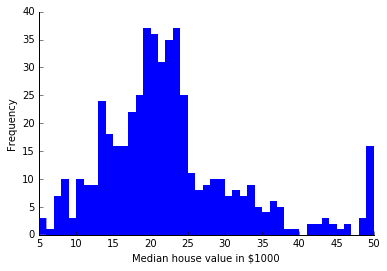

In [271]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.hist(bdata.target, 
         bins=range(int(min(bdata.target)), int(max(bdata.target)) + 1, 1),
         edgecolor='none')
plt.xlabel('Median house value in $1000')
plt.ylabel('Frequency')

axes = plt.axes()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


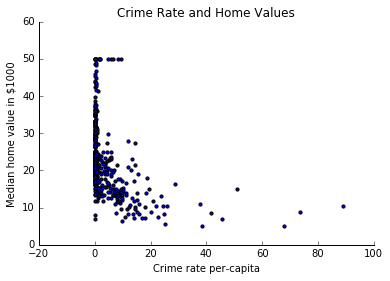

In [300]:
scatt = plt.scatter(boston.CRIM, boston.MEDV, s=10)
scatt.axes.set_title('Crime Rate and Home Values')
scatt.axes.set_xlabel('Crime rate per-capita')
scatt.axes.set_ylabel('Median home value in $1000')
scatt.axes.spines['right'].set_visible(False)
scatt.axes.spines['top'].set_visible(False)
scatt.axes.yaxis.set_ticks_position('left')
scatt.axes.xaxis.set_ticks_position('bottom')

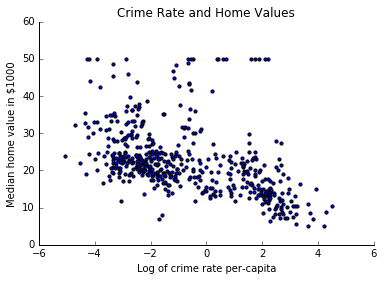

In [321]:
scatt = plt.scatter(np.log(boston.CRIM), boston.MEDV, s=10)
scatt.axes.set_title('Crime Rate and Home Values')
scatt.axes.set_xlabel('Log of crime rate per-capita')
scatt.axes.set_ylabel('Median home value in $1000')
scatt.axes.spines['right'].set_visible(False)
scatt.axes.spines['top'].set_visible(False)
scatt.axes.yaxis.set_ticks_position('left')
scatt.axes.xaxis.set_ticks_position('bottom')

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

From looking at the plot, it looks like there's only a very weak correlation between per-capita crime rate and median home value. A part of the problem with the scatter plot comparing crime rate and housing values is that there is a very dense cluster at 0 crime rate per-capita. Converting the crime rate axis to log-scale provides a much better view of the data. It is possible to see a weak correlation between the two variables in the second plot I added.

The relationship, in my opinion, is going to be mostly correlational. I do not think that housing values inherently affect a neighborhood's crime rate directly. Rather, I think that low median home value suggest that a certain neighborhood has more people of unfortunate circumstances. Those people would in turn be more susceptible to participating in criminal activity.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

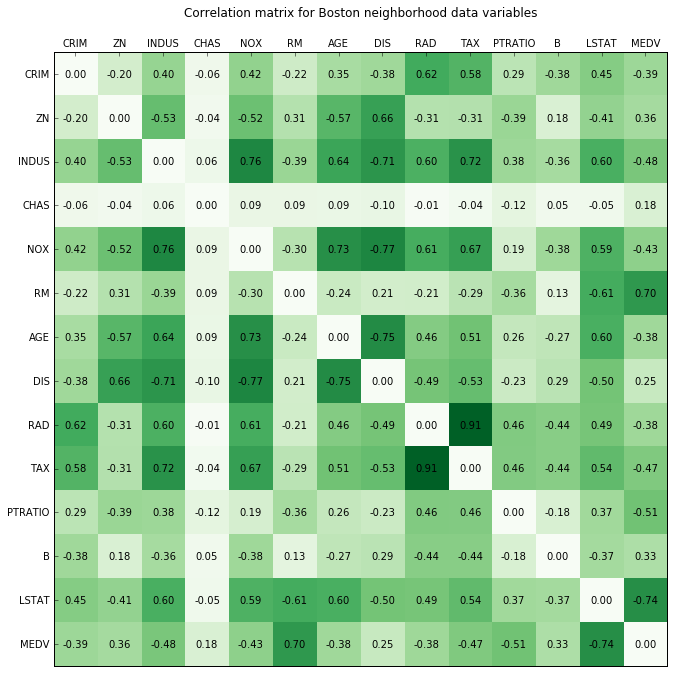

In [341]:
correlations = []

for var1 in boston.columns:
    col_corr = []
    for var2 in boston.columns:
        if var1 != var2:
            col_corr.append(sp.stats.pearsonr(boston[var1], boston[var2])[0])
        else:
            col_corr.append(0)
            
    correlations.append(col_corr)

corr_mat = np.matrix(correlations)
fig = plt.figure(figsize=(11, 11))
axes = fig.add_subplot(111)
matp = axes.matshow(np.abs(corr_mat), vmin=0, vmax=1, cmap=plt.get_cmap('Greens'))
# fig.colorbar(matp)

for (x, y), z in np.ndenumerate(corr_mat):
    axes.text(x, y, '{:0.2f}'.format(z), ha='center', va='center')

axes.set_title('Correlation matrix for Boston neighborhood data variables')
axes.set_xticks(range(len(boston.columns)))
axes.set_xticklabels(boston.columns)
axes.set_yticks(range(len(boston.columns)))
axes.set_yticklabels(boston.columns)
axes.xaxis.set_ticks_position('top')
axes.yaxis.set_ticks_position('left')

In [313]:
print 'TAX -> RAD correlation:', sp.stats.pearsonr(boston.TAX, boston.RAD)
print 'DIS -> NOX correlation:', sp.stats.pearsonr(boston.DIS, 
                                                     boston.NOX)

TAX -> RAD correlation: (0.91022818853318699, 4.1299201194035449e-195)
DIS -> NOX correlation: (-0.76923011322582791, 4.2330626809763381e-100)


It seems that the most positively correlated variables in the data set are TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways). It looks like NOX (nitric oxides concentration parts per 10 million) and DIS (weighted distances to five Boston employment centres) are the most negatively correlated variables in the data set.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

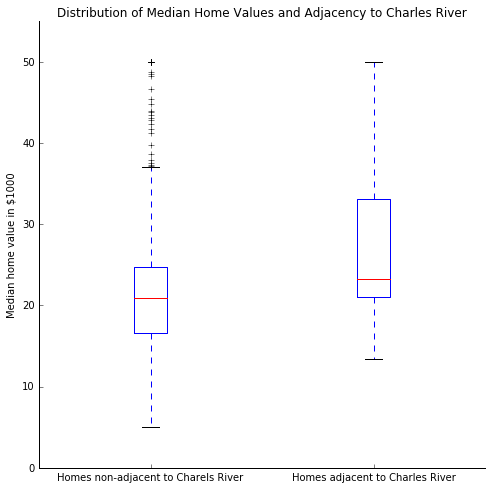

In [372]:
data = [boston[boston.CHAS == 0].MEDV,
        boston[boston.CHAS == 1].MEDV]

plt.figure(figsize=(8, 8))
plt.boxplot(data)
axes = plt.axes()
axes.set_title('Distribution of Median Home Values '
               'and Adjacency to Charles River')
axes.set_xticklabels(['Homes non-adjacent to Charels River',
                      'Homes adjacent to Charles River'])
axes.set_ylabel('Median home value in $1000')
plt.ylim([0, 55])

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')